<a href="https://colab.research.google.com/github/PayalSingh07/Python/blob/main/ML/Data_Analytic_Assignment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Data Analytics Lab – Assignment-1
- Data Cleaning & Preprocessing

In [5]:
from google.colab import files
uploaded = files.upload()

Saving car_data.csv to car_data.csv


##  Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


## Step 2: Load & Understand the Dataset
`car_data.csv`

In [7]:
df = pd.read_csv('car_data.csv')
print("\n")
print(df.shape)
print("\n")
print(df.info())



(11914, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: flo

In [8]:
print(df.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [9]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [10]:
print(df['Make'].value_counts())

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

## Step 3: Filter for Volkswagen Cars Only

In [15]:
new_df = df[df['Make'] == 'Volkswagen']
print(new_df.shape)

(809, 16)


In [19]:
# Check missing values
print(new_df.isnull())
print("\n")
print(new_df.isnull().sum())
print("\n")
print(new_df.shape)

        Make  Model   Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
1792   False  False  False             False      False             False   
1793   False  False  False             False      False             False   
1794   False  False  False             False      False             False   
1795   False  False  False             False      False             False   
1796   False  False  False             False      False             False   
...      ...    ...    ...               ...        ...               ...   
11188  False  False  False             False      False             False   
11189  False  False  False             False      False             False   
11190  False  False  False             False      False             False   
11191  False  False  False             False      False             False   
11192  False  False  False             False      False             False   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  

###  Remove rows with null values

In [20]:
new_df = new_df.dropna()
print(new_df.isnull().sum())
print("\n")
print(new_df.shape)

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


(581, 16)


## Step 4: Select Features : 'Engine HP', 'MSRP'

In [21]:
new_df = new_df[['Engine HP', 'MSRP']]
print(new_df.shape)
print("\n")
print(new_df.head())

(581, 2)


      Engine HP   MSRP
1793      210.0  31795
1794      210.0  34895
1796      140.0  32755
1797      210.0  29395
1800      210.0  30495


In [22]:
print(new_df.sample(2))

      Engine HP   MSRP
6128      210.0  29280
5370      220.0  30380


Dataframe X contais 'Engine HP'
Dataframe Y contains 'MSRP'

In [24]:
X = np.array(new_df[['Engine HP']])
y = np.array(new_df[['MSRP']])
print(X.shape)
print(y.shape)

(581, 1)
(581, 1)


## Step 5: Scatter Plot – HP vs Price

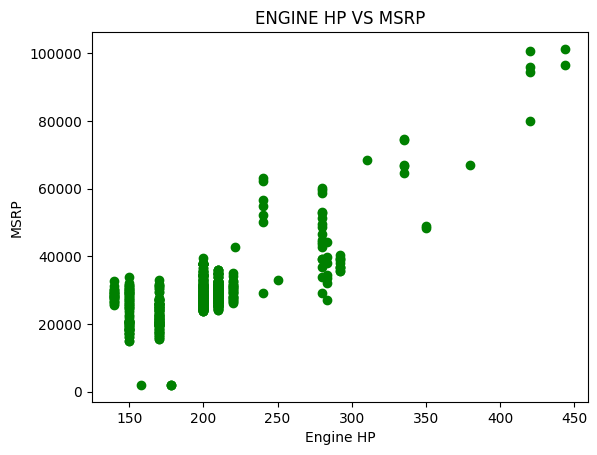

In [25]:
plt.scatter(X, y, color='green')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('ENGINE HP VS MSRP')
plt.show()

## Step 6: Train-Test Split : 25% for testing and 75% for training

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(435, 1)
(146, 1)
(435, 1)
(146, 1)


In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

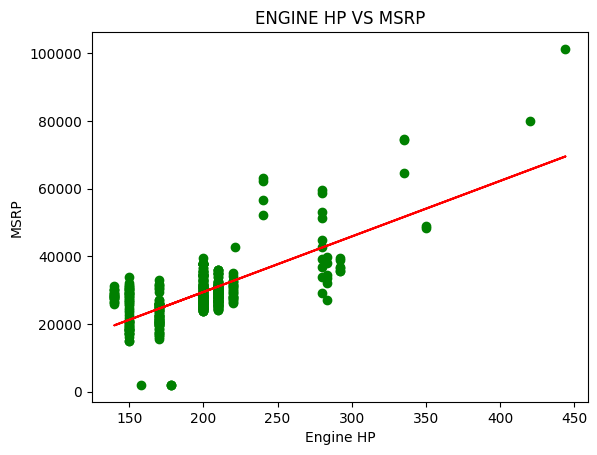

In [33]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('ENGINE HP VS MSRP')
plt.show()